In [0]:
%tensorflow_version 2.x

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, RMSprop
from tensorflow.keras.initializers import RandomNormal, RandomUniform
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalHinge, MeanSquaredError
from tensorflow.keras import regularizers
from sklearn import preprocessing

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/Colab Notebooks/Deep Learning'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/Deep Learning


In [0]:
dataset = pd.read_csv("heart.csv")

In [11]:
# Check if data is skewed
dataset[list(dataset.columns)].apply(lambda x: skew(x.dropna()))

age        -0.201460
sex        -0.787412
cp          0.482329
trestbps    0.710230
chol        1.137733
fbs         1.976803
restecg     0.161717
thalach    -0.534746
exang       0.738851
oldpeak     1.263426
slope      -0.505796
ca          1.303926
thal       -0.474359
target     -0.178930
dtype: float64

In [12]:
# Check if there are missing values
dataset.isnull().values.any()

False

In [0]:
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

## TODO START:: Data Pre-Processing

X = StandardScaler().fit_transform(X)

## TODO End:: Data Pre-Processing

# Get Training Data
train_X, temporary_X, train_y, temporary_y = train_test_split(X, y, train_size=0.75, random_state=0)

# Get Validation & Testing Data
val_X, test_X, val_y, test_y = train_test_split(temporary_X, temporary_y, train_size=0.5, random_state=0)

Highest Test accuracy

Train on 227 samples, validate on 38 samples
Epoch 1/1000
227/227 [==============================] - 0s 2ms/sample - loss: 0.9442 - accuracy: 0.6916 - val_loss: 0.9170 - val_accuracy: 0.8158
Epoch 2/1000
227/227 [==============================] - 0s 243us/sample - loss: 0.8689 - accuracy: 0.8282 - val_loss: 0.8384 - val_accuracy: 0.8158
Epoch 3/1000
227/227 [==============================] - 0s 225us/sample - loss: 0.7935 - accuracy: 0.8326 - val_loss: 0.7744 - val_accuracy: 0.8158
Epoch 4/1000
227/227 [==============================] - 0s 227us/sample - loss: 0.7367 - accuracy: 0.8370 - val_loss: 0.7389 - val_accuracy: 0.8421
Epoch 5/1000
227/227 [==============================] - 0s 229us/sample - loss: 0.7017 - accuracy: 0.8326 - val_loss: 0.7140 - val_accuracy: 0.8421
Epoch 6/1000
227/227 [==============================] - 0s 234us/sample - loss: 0.6783 - accuracy: 0.8502 - val_loss: 0.7013 - val_accuracy: 0.8421
Epoch 7/1000
227/227 [==============================] - 0s 243us/samp

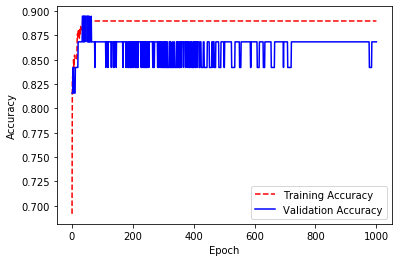

In [15]:

## TODO START:: Model Definition, Writing the Model using Tensorflow.Keras is a must
model = Sequential()
model.add(Dense(1, input_dim=13, kernel_initializer='random_uniform'))
model.add(Dense(1, kernel_initializer='random_uniform', activation='sigmoid'))

## TODO END:: Model Definition

## TODO Try Different losses & optimizers here
rmsprop = RMSprop(lr = 0.01)
model.compile(loss=CategoricalHinge(), metrics=['accuracy'], optimizer=rmsprop)
hist = model.fit(train_X, train_y, verbose=1, validation_data=(val_X, val_y), batch_size=16, epochs=1000)
score, accuracy = model.evaluate(test_X, test_y, batch_size=16, verbose=0)

print("Test fraction correct (NN-Score) = {:.2f}".format(score))
print("Test fraction correct (NN-Accuracy) = {:.2f}".format(accuracy))

# Get training and test loss histories
training_loss = hist.history['accuracy']
val_loss = hist.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.figure()
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

Highest Validation accuracy

Train on 227 samples, validate on 38 samples
Epoch 1/500
227/227 [==============================] - 0s 2ms/sample - loss: 0.9561 - accuracy: 0.6344 - val_loss: 0.9521 - val_accuracy: 0.7895
Epoch 2/500
227/227 [==============================] - 0s 253us/sample - loss: 0.9186 - accuracy: 0.8018 - val_loss: 0.8922 - val_accuracy: 0.7632
Epoch 3/500
227/227 [==============================] - 0s 259us/sample - loss: 0.8456 - accuracy: 0.8282 - val_loss: 0.8106 - val_accuracy: 0.7895
Epoch 4/500
227/227 [==============================] - 0s 231us/sample - loss: 0.7611 - accuracy: 0.8282 - val_loss: 0.7500 - val_accuracy: 0.8158
Epoch 5/500
227/227 [==============================] - 0s 212us/sample - loss: 0.7075 - accuracy: 0.8326 - val_loss: 0.7176 - val_accuracy: 0.8158
Epoch 6/500
227/227 [==============================] - 0s 234us/sample - loss: 0.6792 - accuracy: 0.8458 - val_loss: 0.7041 - val_accuracy: 0.8158
Epoch 7/500
227/227 [==============================] - 0s 238us/sample - lo

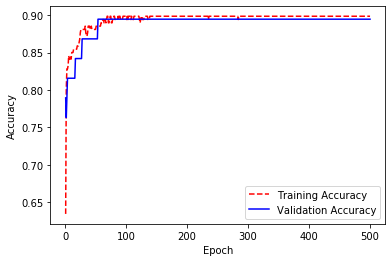

In [16]:
## TODO START:: Model Definition, Writing the Model using Tensorflow.Keras is a must
model = Sequential()
model.add(Dense(1, input_dim=13, kernel_initializer='random_uniform'))
model.add(Dense(1, kernel_initializer='random_uniform', activation='sigmoid'))

## TODO END:: Model Definition

## TODO Try Different losses & optimizers here
adam = Adam(lr = 0.01)
model.compile(loss=CategoricalHinge(), metrics=['accuracy'], optimizer=adam)
hist = model.fit(train_X, train_y, verbose=1, validation_data=(val_X, val_y), batch_size=16, epochs=500)
score, accuracy = model.evaluate(test_X, test_y, batch_size=16, verbose=0)

print("Test fraction correct (NN-Score) = {:.2f}".format(score))
print("Test fraction correct (NN-Accuracy) = {:.2f}".format(accuracy))

# Get training and test loss histories
training_loss = hist.history['accuracy']
val_loss = hist.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.figure()
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()